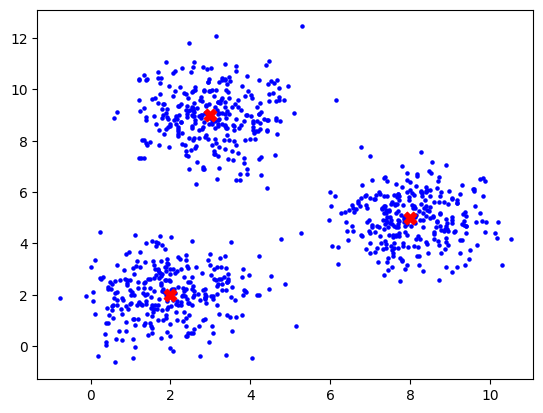

In [6]:
import random
import time
import math
import matplotlib.pyplot as plt

#  centroids
initial_centroids = [(2, 2), (8, 5), (3, 9)]

#  data
def generate_data(centroids, points_per_centroid=300):
    data = []
    for cx, cy in centroids:
        for _ in range(points_per_centroid):
            x = random.gauss(cx, 1) # use gauss func 
            y = random.gauss(cy, 1)
            data.append((x, y))
    return data

data = generate_data(initial_centroids)
plt.figure()
plt.scatter([p[0] for p in data], [p[1] for p in data], s=5, c='blue')
for c in initial_centroids:
    plt.scatter(c[0], c[1], s=80, c='red', marker='X')
plt.show()


In [7]:
def euclidean_distance(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def initialize_centroids(k):
    return random.sample(data, k)

def assign_points_to_clusters(centroids, points):
    clusters = [[] for _ in centroids]
    for p in points:
        distances = [euclidean_distance(p, c) for c in centroids]
        min_index = distances.index(min(distances))
        clusters[min_index].append(p)
    return clusters

def compute_new_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if len(cluster) == 0:
            new_centroids.append((0,0))
            continue
        x_mean = sum([p[0] for p in cluster]) / len(cluster)
        y_mean = sum([p[1] for p in cluster]) / len(cluster)
        new_centroids.append((x_mean, y_mean))
    return new_centroids


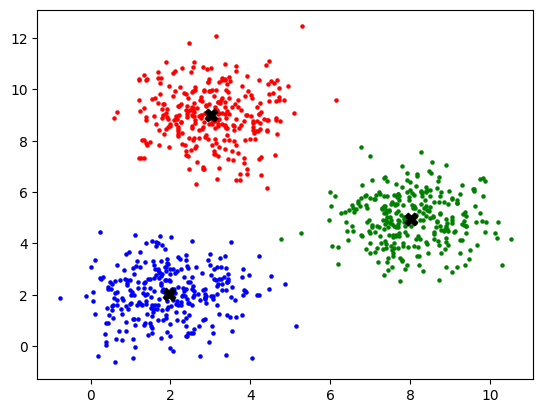

In [8]:

start_time = time.time()
k = len(initial_centroids)
centroids_py = initialize_centroids(k)
for _ in range(500):
    clusters_py = assign_points_to_clusters(centroids_py, data)
    centroids_py = compute_new_centroids(clusters_py)
plain_python_time = time.time() - start_time

colors = ['red','green','blue','orange']
plt.figure()
for i, cluster in enumerate(clusters_py):
    xs = [p[0] for p in cluster]
    ys = [p[1] for p in cluster]
    plt.scatter(xs, ys, s=5, c=colors[i % len(colors)])
for c in centroids_py:
    plt.scatter(c[0], c[1], s=80, c='black', marker='X')
plt.show()

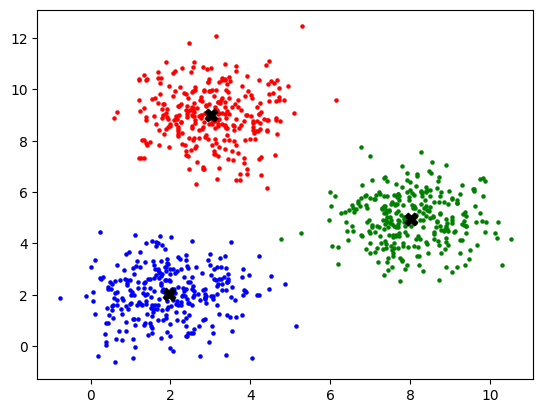

In [9]:

import numpy as np

data_np = np.array(data)

def kmeans_vectorized(data, k, iterations=500):
    centroids = data[np.random.choice(len(data), k, replace=False)]
    for _ in range(iterations):
        dists = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(dists, axis=0)
        for i in range(k):
            points = data[labels == i]
            if len(points) > 0:
                centroids[i] = np.mean(points, axis=0)
    return centroids, labels

start_time = time.time()
centroids_np, labels_np = kmeans_vectorized(data_np, k)
numpy_time = time.time() - start_time

plt.figure()
for i in range(k):
    cluster_points = data_np[labels_np == i]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], s=5, c=colors[i % len(colors)])
plt.scatter(centroids_np[:,0], centroids_np[:,1], s=80, c='black', marker='X')
plt.show()


In [10]:
print(f"Plain Python time: {plain_python_time:.4f}s")
print(f"NumPy vectorized time: {numpy_time:.4f}s")

Plain Python time: 0.4888s
NumPy vectorized time: 0.0829s
